In [31]:
import numpy as np
import os
import io
import warnings
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict,GridSearchCV
from pprint import pprint
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#globa settings
mpl.rc('figure',figsize=(8,6))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)
X=X.to_numpy()
y=y.to_numpy()
X = MinMaxScaler().fit_transform(X)

<ipython-input-6-12c16637ab57>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor=np.int(np.sqrt(num_images))


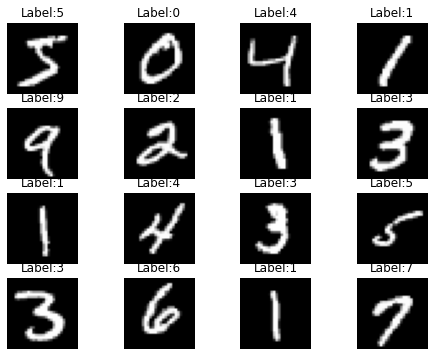

In [6]:
num_images= 16
factor=np.int(np.sqrt(num_images))
fig,ax=plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))
idx_offset=0 #take "num_images" starting from the index "idx_offset"
for i in range(factor):
    index=idx_offset+i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i,j].set_axis_off()
        

In [7]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))
indx_0=np.where(y_train=='0')
y_train_0[indx_0]=1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

In [10]:
bin_clf= Perceptron(max_iter=100,random_state=1729)
bin_clf.fit(x_train,y_train_0)
print("Dimension of weights w:" ,bin_clf.coef_.shape)
print("Bias:" ,bin_clf.intercept_)
print("The loss function:" ,bin_clf.loss_function_)

Dimension of weights w: (1, 784)
Bias: [-108.]
The loss function: <sklearn.linear_model._sgd_fast.Hinge object at 0x0000018FD7CE0490>


In [11]:
print("Training accuracy:" ,bin_clf.score(x_train,y_train_0))
print('Test accuracy: ',bin_clf.score(x_test,y_test_0))

Training accuracy: 0.99095
Test accuracy:  0.989


In [15]:
y_hat_test_0 = bin_clf.predict(x_test)
indx_0 = np.where(y_test_0 == 1)
zerol=y_hat_test_0[indx_0[0]]
num_wrong=np.count_nonzero(zerol==-1)
num_right=len(zerol)-num_wrong
accuracy=num_right/len(zerol)
print(accuracy)

0.9193877551020408


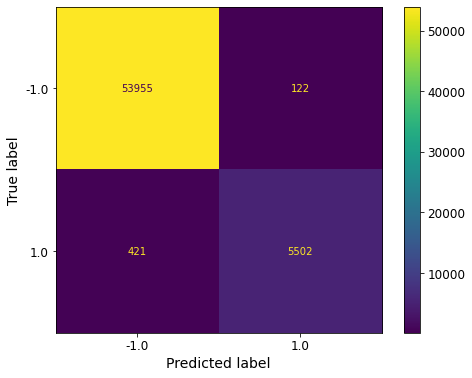

In [23]:
y_hat_train_0 = bin_clf.predict(x_train)
cm = confusion_matrix(y_train_0, y_hat_train_0, labels=bin_clf.classes_)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bin_clf.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

In [25]:
scores=cross_validate(bin_clf,x_train,y_train_0,cv=5,scoring=['precision','recall','f1'],
                     return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([2.02057052, 3.94307494, 2.96583533, 2.66160798, 3.35796428]),
 'score_time': array([0.06369019, 0.06273222, 0.05497241, 0.06292677, 0.06301856]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


In [26]:
bin_clf_warm = Perceptron(max_iter=100,random_state=1729,warm_start=True)

In [30]:
bin_clf_warm.fit(x_train,y_train_0)
print('Training Accuracy:',bin_clf_warm.score(x_train,y_train_0))

Training Accuracy: 0.9837833333333333


In [33]:
clf = Perceptron(random_state=1729)
y_train_ovr=LabelBinarizer().fit_transform(y_train)
clf.fit(x_train,y_train)

Perceptron(random_state=1729)

In [34]:
y_hat = clf.predict(x_train)
print(classification_report(y_train,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



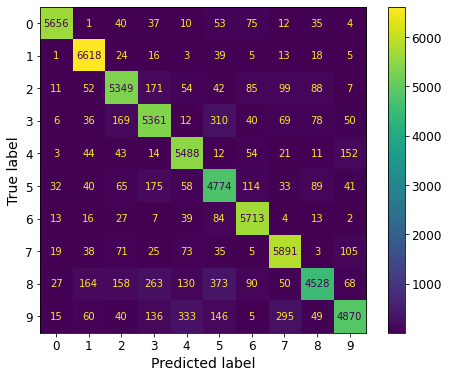

In [35]:
cm = confusion_matrix(y_train, y_hat, labels=clf.classes_)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

In [36]:
scoring = make_scorer(hinge_loss,greater_is_better=False)
lr_grid = [1/2**n for n in range(1,6)]
bin_clf_gscv = GridSearchCV(Perceptron(),param_grid={"eta0":lr_grid},scoring=scoring,cv=5)
bin_clf_gscv.fit(x_train,y_train_0)
pprint(bin_clf_gscv.cv_results_)

{'mean_fit_time': array([2.38256755, 2.37139916, 2.24886742, 1.82720189, 1.7230072 ]),
 'mean_score_time': array([0.03300595, 0.03611217, 0.03784637, 0.03005962, 0.0341208 ]),
 'mean_test_score': array([-0.0285    , -0.0285    , -0.02643333, -0.03066667, -0.0421    ]),
 'param_eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.5},
            {'eta0': 0.25},
            {'eta0': 0.125},
            {'eta0': 0.0625},
            {'eta0': 0.03125}],
 'rank_test_score': array([2, 2, 1, 4, 5]),
 'split0_test_score': array([-0.02166667, -0.02166667, -0.02166667, -0.02166667, -0.02166667]),
 'split1_test_score': array([-0.0395, -0.0395, -0.0395, -0.0395, -0.0395]),
 'split2_test_score': array([-0.02816667, -0.02816667, -0.02816667, -0.02816667, -0.02816667]),
 'split3_test_score': array([-0.023     , -0.023     , -0.023     , -0.04416667, -0.04416667]),
 